In [3]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [65]:
output_dir = list(os.listdir('../output'))

In [66]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [67]:
df_all = df_template[:]
for file in output_dir:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [68]:
datasets = list(os.listdir('../datasets'))

In [6]:
for ds in datasets:
    output_dataset = list(filter(lambda x: fnmatch.fnmatch(x, '*' + ds + '*'), output_dir))
    
df_all = df_template[:]

for file in output_dataset:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [69]:
df_all['cost'] = df_all.index

In [70]:
pyhard_datasets = df_all[df_all.package == 'Pyhard']['dataset'].unique()

In [71]:
df_all = df_all[df_all.dataset.isin(pyhard_datasets)]

### Groupby por dataset

In [72]:
df = df_all[:]

In [73]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [74]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset     package  strategy                    classifier                 
1069_pc2    baseline baseline                    5NN             0.160823   
                                                 RF              1.131878   
            Pyhard   Lowest Harmfulness Sampling 5NN           100.896249   
            baseline baseline                    C4.5            0.021406   
1116_musk   baseline baseline                    NB              0.125731   
...                                                                   ...   
1460_banana Pyhard   Highest LSC Sampling        NB             96.873121   
                     Highest Usefulness Sampling NB             91.945004   
                     Lowest N2 Sampling          NB             95.408275   
            baseline baseline                    NB              0.035633   
            Pyhard   Lowest Harmfulness Sampling NB             96.280631   

                                                             sample_size  \
dataset     package  strategy                    classifier                
1069_pc2    baseline baseline                    5NN          837.000000   
                                                 RF           837.000000   
            Pyhard   Lowest Harmfulness Sampling 5NN            0.098765   
            baseline baseline                    C4.5         837.000000   
1116_musk   baseline baseline                    NB           989.000000   
...                                                                  ...   
1460_banana Pyhard   Highest LSC Sampling        NB             0.104151   
                     Highest Usefulness Sampling NB             0.104151   
                     Lowest N2 Sampling          NB             0.104151   
            baseline baseline                    NB           795.000000   
            Pyhard   Lowest Harmfulness Sampling NB             0.104151   

                                                             accuracy_history  \
dataset     package  strategy                    classifier                     
1069_pc2    baseline baseline                    5NN                 0.996429   
                                                 RF                  0.995714   
            Pyhard   Lowest Harmfulness Sampling 5NN                 0.995927   
            baseline baseline                    C4.5                0.992857   
1116_musk   baseline baseline                    NB                  0.993333   
...                                                                       ...   
1460_banana Pyhard   Highest LSC Sampling        NB                  0.620114   
                     Highest Usefulness Sampling NB                  0.617778   
                     Lowest N2 Sampling          NB                  0.600165   
            baseline baseline                    NB                  0.602264   
            Pyhard   Lowest Harmfulness Sampling NB                  0.557993   

                                                             f1_history  
dataset     package  strategy                    classifier              
1069_pc2    baseline baseline                    5NN           0.994646  
                                                 RF            0.994288  
            Pyhard   Lowest Harmfulness Sampling 5NN           0.993894  
            baseline baseline                    C4.5          0.993804  
1116_musk   baseline baseline                    NB            0.993392  
...                                                                 ...  
1460_banana Pyhard   Highest LSC Sampling        NB            0.611316  
                     Highest Usefulness Sampling NB            0.596400  
                     Lowest N2 Sampling          NB            0.574583  
            baseline baseline                    NB            0.563173  
            Pyhard   Lowest Harmfulness Sampling NB            0.530871  

[140 rows x 4 columns]

In [63]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  sample_size  \
package  strategy                     classifier                              
baseline baseline                     RF              1.195908   617.333333   
                                      5NN             0.122883   617.333333   
Pyhard   Highest LSC Sampling         RF            125.881216     0.153892   
         Highest Usefulness Sampling  RF            121.848780     0.153892   
         Lowest H, Highest U Sampling 5NN           114.222085     0.153892   
         Highest Usefulness Sampling  5NN           113.249704     0.153892   
         Lowest H, Highest U Sampling RF            125.164669     0.153892   
         Highest LSC Sampling         5NN           115.424905     0.153892   
baseline baseline                     C4.5            0.052244   617.333333   
Pyhard   Lowest Harmfulness Sampling  5NN           101.888204     0.224720   
                                      RF            123.712954     0.153892   
         Lowest N2 Sampling           5NN           111.513191     0.153892   
                                      RF            114.633734     0.153892   
         Highest Usefulness Sampling  C4.5           83.185951     0.153892   
         Lowest H, Highest U Sampling C4.5           82.614120     0.153892   
         Highest LSC Sampling         C4.5           83.077868     0.153892   
         Lowest Harmfulness Sampling  C4.5           84.768243     0.153892   
         Lowest N2 Sampling           C4.5           93.974624     0.153892   
baseline baseline                     NB              0.042909   617.333333   
Pyhard   Highest LSC Sampling         NB            104.636834     0.153892   
         Lowest H, Highest U Sampling NB            104.945032     0.153892   
         Highest Usefulness Sampling  NB            103.693036     0.153892   
         Lowest Harmfulness Sampling  NB            105.020416     0.153892   
         Lowest N2 Sampling           NB             94.973038     0.153892   

                                                  accuracy_history  f1_history  
package  strategy                     classifier                                
baseline baseline                     RF                  0.915552    0.909377  
                                      5NN                 0.906093    0.899490  
Pyhard   Highest LSC Sampling         RF                  0.896547    0.888280  
         Highest Usefulness Sampling  RF                  0.893636    0.885689  
         Lowest H, Highest U Sampling 5NN                 0.891353    0.883138  
         Highest Usefulness Sampling  5NN                 0.888640    0.882834  
         Lowest H, Highest U Sampling RF                  0.891590    0.882550  
         Highest LSC Sampling         5NN                 0.890098    0.882177  
baseline baseline                     C4.5                0.875591    0.876960  
Pyhard   Lowest Harmfulness Sampling  5NN                 0.882058    0.875654  
                                      RF                  0.887339    0.875320  
         Lowest N2 Sampling           5NN                 0.880839    0.872646  
                                      RF                  0.883539    0.872369  
         Highest Usefulness Sampling  C4.5                0.869785    0.868045  
         Lowest H, Highest U Sampling C4.5                0.868382    0.866934  
         Highest LSC Sampling         C4.5                0.867008    0.866934  
         Lowest Harmfulness Sampling  C4.5                0.861659    0.860995  
         Lowest N2 Sampling           C4.5                0.856180    0.855592  
baseline baseline                     NB                  0.827271    0.833047  
Pyhard   Highest LSC Sampling         NB                  0.822662    0.824494  
         Lowest H, Highest U Sampling NB                  0.819399    0.820871  
         Highest Usefulness Sampling  NB                  0.810974    0.809754  
         Lowest Harmfulness Sampling  NB           

In [75]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset           package  strategy                     classifier                 
1050_pc3          baseline baseline                     NB              0.002283   
11_balance-scale  baseline baseline                     C4.5            0.004209   
1460_banana       Pyhard   Highest LSC Sampling         NB              0.082186   
                           Highest Usefulness Sampling  NB              2.299889   
1043_ada_agnostic Pyhard   Highest Usefulness Sampling  NB              0.664630   
...                                                                          ...   
1056_mc1          Pyhard   Lowest N2 Sampling           5NN             4.704350   
                           Lowest Harmfulness Sampling  5NN             3.194968   
                           Lowest H, Highest U Sampling 5NN             2.284604   
                           Highest Usefulness Sampling  5NN             3.292366   
                           Lowest Harmfulness Sampling  NB              0.536943   

                                                                    sample_size  \
dataset           package  strategy                     classifier                
1050_pc3          baseline baseline                     NB                  0.0   
11_balance-scale  baseline baseline                     C4.5                0.0   
1460_banana       Pyhard   Highest LSC Sampling         NB                  0.0   
                           Highest Usefulness Sampling  NB                  0.0   
1043_ada_agnostic Pyhard   Highest Usefulness Sampling  NB                  0.0   
...                                                                         ...   
1056_mc1          Pyhard   Lowest N2 Sampling           5NN                 0.0   
                           Lowest Harmfulness Sampling  5NN                 0.0   
                           Lowest H, Highest U Sampling 5NN                 0.0   
                           Highest Usefulness Sampling  5NN                 0.0   
                           Lowest Harmfulness Sampling  NB                  0.0   

                                                                    accuracy_history  \
dataset           package  strategy                     classifier                     
1050_pc3          baseline baseline                     NB                  0.211519   
11_balance-scale  baseline baseline                     C4.5                0.129979   
1460_banana       Pyhard   Highest LSC Sampling         NB                  0.071255   
                           Highest Usefulness Sampling  NB                  0.047603   
1043_ada_agnostic Pyhard   Highest Usefulness Sampling  NB                  0.071700   
...                                                                              ...   
1056_mc1          Pyhard   Lowest N2 Sampling           5NN                 0.000000   
                           Lowest Harmfulness Sampling  5NN                 0.000000   
                           Lowest H, Highest U Sampling 5NN                 0.000000   
                           Highest Usefulness Sampling  5NN                 0.000000   
                           Lowest Harmfulness Sampling  NB                  0.000000   

                                                                    f1_history  
dataset           package  strategy                     classifier              
1050_pc3          baseline baseline                     NB            0.208587  
11_balance-scale  baseline baseline                     C4.5          0.104781  
1460_banana       Pyhard   Highest LSC Sampling         NB            0.072613  
                           Highest Usefulness Sampling  NB            0.071131  
1043_ada_agnostic Pyhard   Highest Usefulness Sampling  NB            0.070145  
...                                                                        ...  
1056_mc1          Pyhard   Lowest N2 Sampling           5NN           0.000000  
                     

In [13]:
### Groupby por dataset

df = pd.DataFrame.from_dict(total_performance_history)

# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

df.groupby(['dataset','package','strategy', 'classifier']).mean().sort_values("f1_history", ascending = False)

df.groupby(['dataset','package','strategy', 'classifier']).std().sort_values("f1_history", ascending = False)

ax = sns.boxplot(data=df_last_result, x="accuracy_history", y="Strategy", orient="h"
                )

ax = sns.boxplot(data=df_last_result, x="f1_history", y="Strategy", orient="h"
                )

NameError: name 'total_performance_history' is not defined

## Boxplot

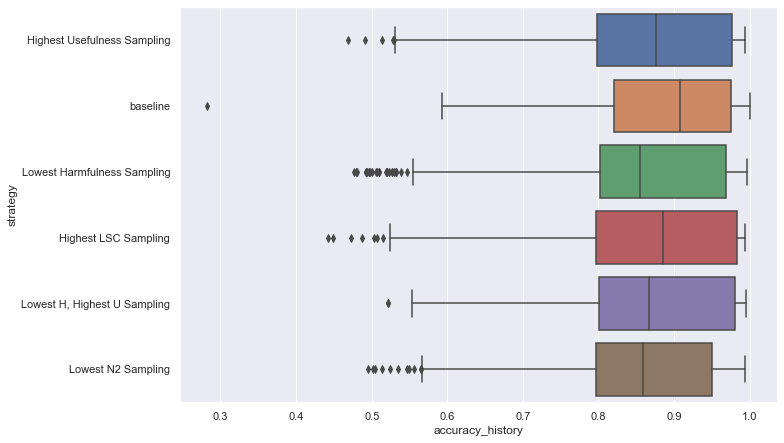

In [76]:
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h")

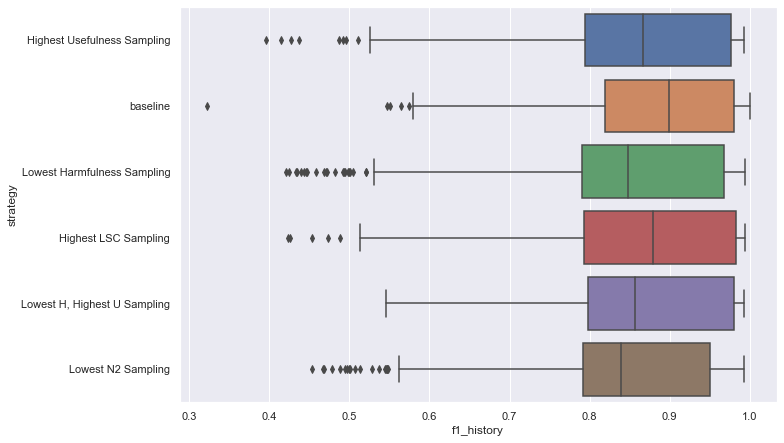

In [77]:
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h"
                )

## Testes (lineplot)

In [47]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


k_legend = []
for idx,pht in enumerate(performance_history_total):
    ax.plot(pht)
    ax.scatter(range(len(pht)), pht, s=13)
    k_legend.append('k = ' + str(k_neighbor[idx]))

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title("Incremental classification accuracy with {n_queries} queries".format(n_queries = N_QUERIES))
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
ax.legend(k_legend, loc='lower right')

plt.show()

[None]

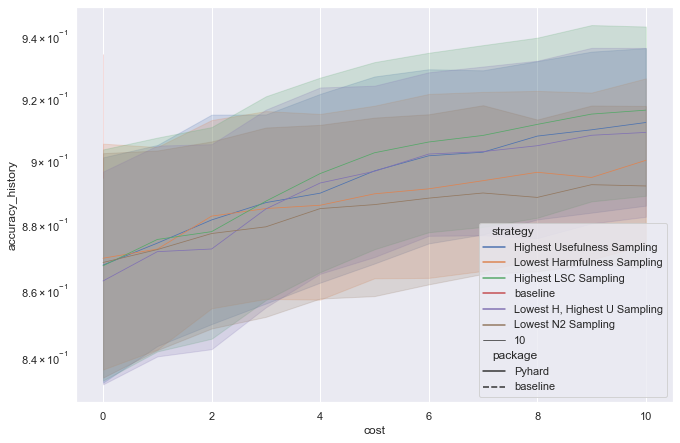

In [78]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

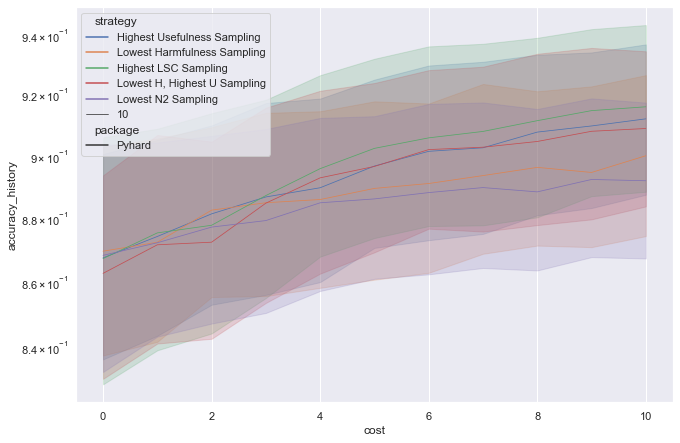

In [89]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package == "Pyhard") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

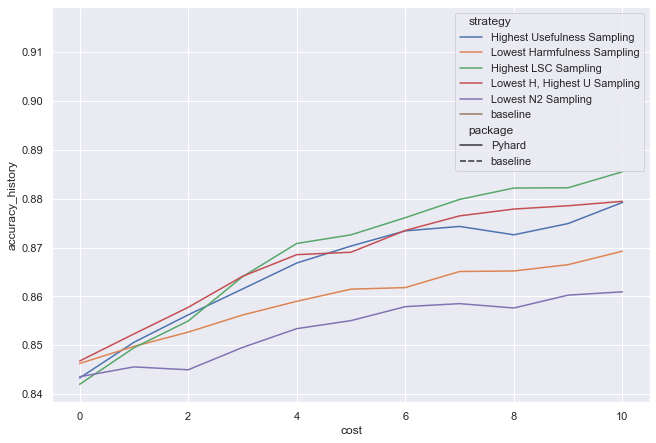

In [88]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package", ci=None,
             data=df_all[(df_all.package != "baseline") | (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')])

## Heatmap

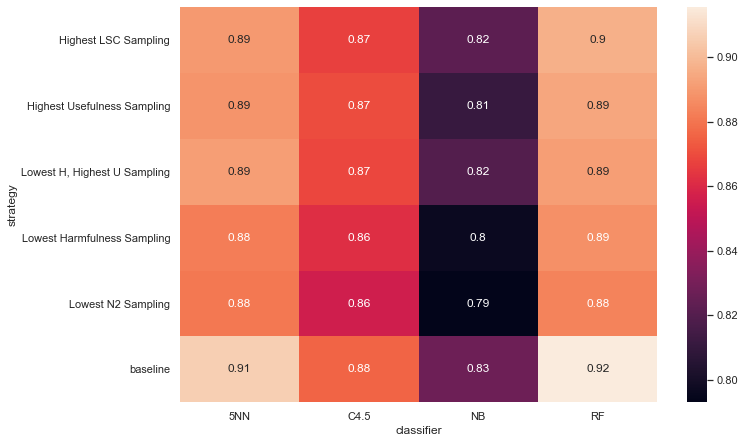

In [87]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='accuracy_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

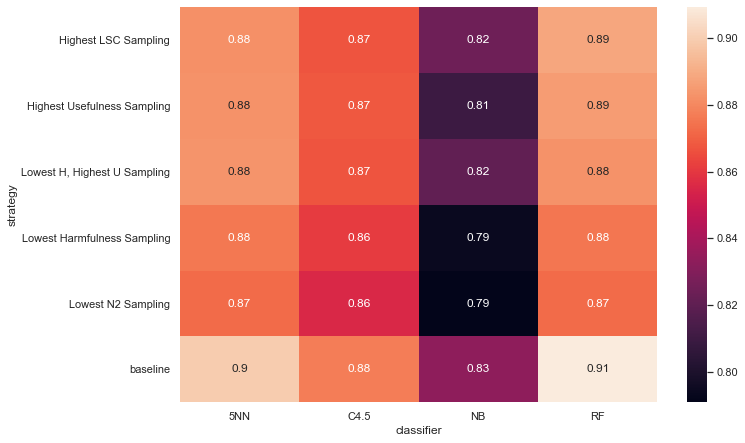

In [86]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

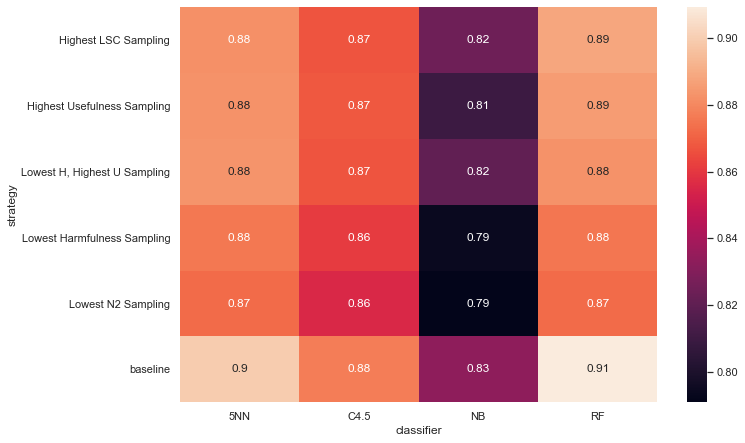

In [85]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)